# Experiment 1: Working with Python packages - Numpy, Scipy, Scikit-Learn, Matplotlib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loan_train_file = "datasets/loan_train.csv"
loan_test_file = "datasets/loan_test.csv"

email_file = "datasets/emails.csv"

handwritten_file = "datasets/english.csv"

iris_file = "datasets/iris.csv"

diabetes_file = "datasets/diabetes.csv"

## Loan Prediction:

In [ ]:
import pandas as pd

df = pd.read_csv(loan_train_file)
df_new = pd.read_csv(loan_test_file)

df = pd.concat([df, df_new])

In [ ]:
# Removing rows with NaN loan amount.
df = df[~df["LoanAmount"].isna()]

In [ ]:
df = df.drop(columns=['Loan_ID', 'Loan_Status'])

target = df['LoanAmount']
features = df.drop(columns=['LoanAmount'])

In [ ]:
print(features.info())
print('\n')
print("Number of NaN values")
print(features.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 1 to 366
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             930 non-null    object 
 1   Married            952 non-null    object 
 2   Dependents         932 non-null    object 
 3   Education          954 non-null    object 
 4   Self_Employed      900 non-null    object 
 5   ApplicantIncome    954 non-null    int64  
 6   CoapplicantIncome  954 non-null    float64
 7   Loan_Amount_Term   934 non-null    float64
 8   Credit_History     876 non-null    float64
 9   Property_Area      954 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 82.0+ KB
None


Number of NaN values
Gender               24
Married               2
Dependents           22
Education             0
Self_Employed        54
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     20
Credit_History       78
Property_Area    

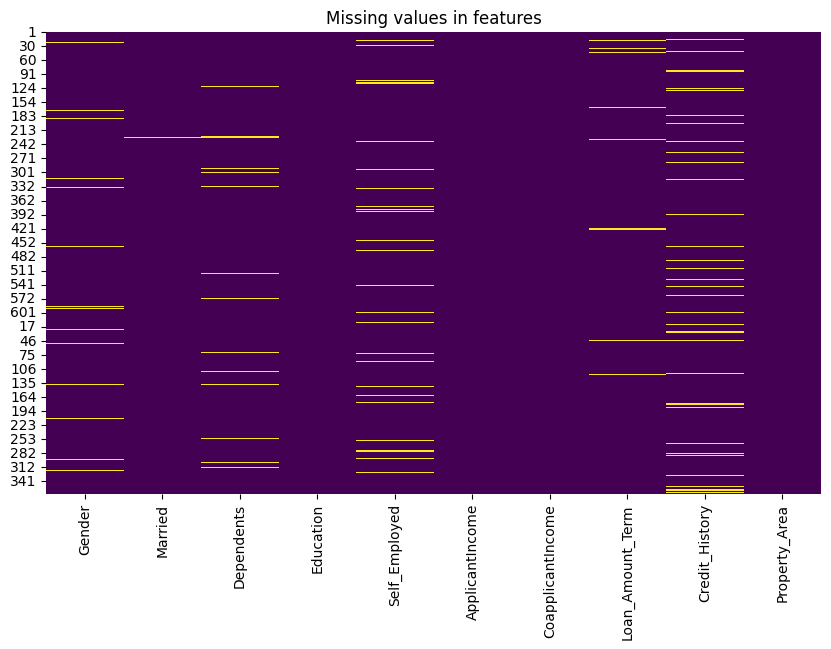

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values in features")
plt.show()

In [ ]:
features['Gender'] = features['Gender'].fillna(features['Gender'].mode()[0])
features['Married'] = features['Married'].fillna(features['Married'].mode()[0])
features['Dependents'] = features['Dependents'].fillna(features['Dependents'].mode()[0])
features['Self_Employed'] = features['Self_Employed'].fillna(features['Self_Employed'].mode()[0])
features['Credit_History'] = features['Credit_History'].fillna(features['Credit_History'].mode()[0])
features['Loan_Amount_Term'] = features['Loan_Amount_Term'].fillna(features['Loan_Amount_Term'].mode()[0])

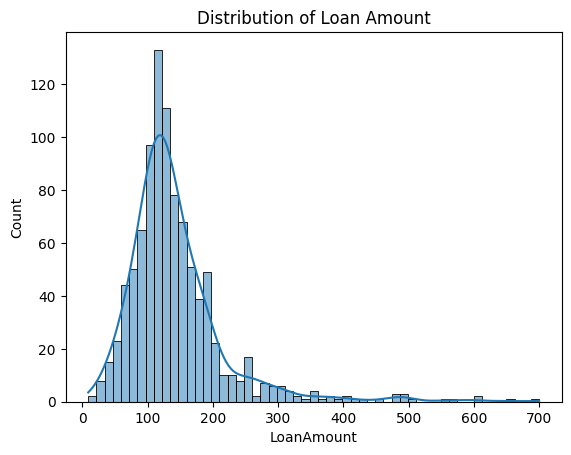

In [ ]:
sns.histplot(target, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("LoanAmount")
plt.show()

## Hand-written Character Recognition

In [ ]:
import pandas as pd

df = pd.read_csv(handwritten_file)
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [ ]:
df["label"].value_counts()

,count
label,
0,55
1,55
2,55
3,55
4,55
...,...
v,55
w,55
x,55


## Email Spam Classification

In [ ]:
import pandas as pd

df = pd.read_csv(email_file)

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df["Prediction"].value_counts()

,count
Prediction,
0,3672
1,1500


In [ ]:
word_columns = df.columns[1:-1]

total_counts = df[word_columns].sum()

In [ ]:
min_occurrence = 500
valid_words = total_counts[total_counts >= min_occurrence].index

spam_word_counts = df[df['Prediction'] == 1][valid_words].sum()
non_spam_word_counts = df[df['Prediction'] == 0][valid_words].sum()

word_diff = pd.DataFrame({
    'spam': spam_word_counts,
    'non_spam': non_spam_word_counts,
})

In [ ]:
word_diff['spam_ratio'] = word_diff['spam'] / (word_diff['spam'] + word_diff['non_spam'] + 1e-5)  # smoothing
word_diff['abs_diff'] = abs(word_diff['spam'] - word_diff['non_spam'])

top_spam_ratio_words = word_diff.sort_values('spam_ratio', ascending=False).head(20)

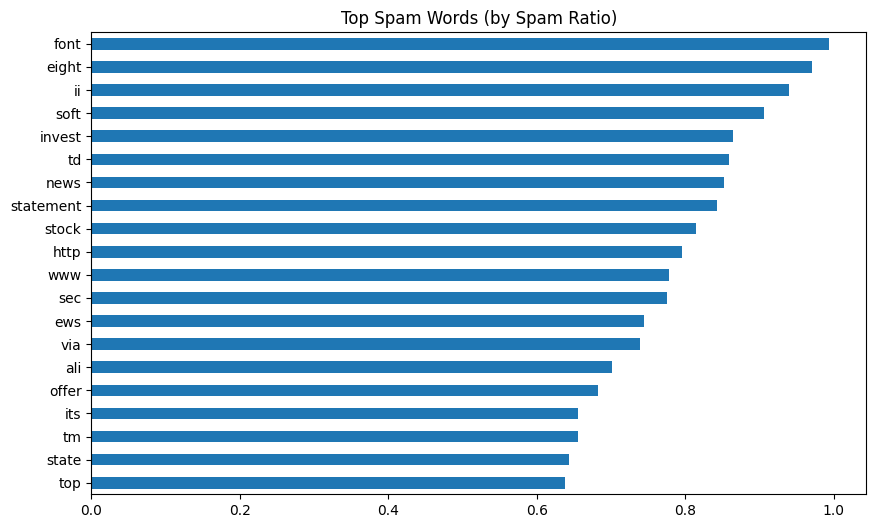

In [ ]:
import matplotlib.pyplot as plt

top_spam_ratio_words['spam_ratio'].plot(kind='barh', title='Top Spam Words (by Spam Ratio)', figsize=(10,6))
plt.gca().invert_yaxis()
plt.show()

## Predicting Diabetes

In [ ]:
import pandas as pd

df = pd.read_csv(diabetes_file)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
correlation = df.corr(numeric_only=True)

# Display correlation with 'Outcome' column
outcome_corr = correlation['Outcome'].sort_values(ascending=False)
print(outcome_corr)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


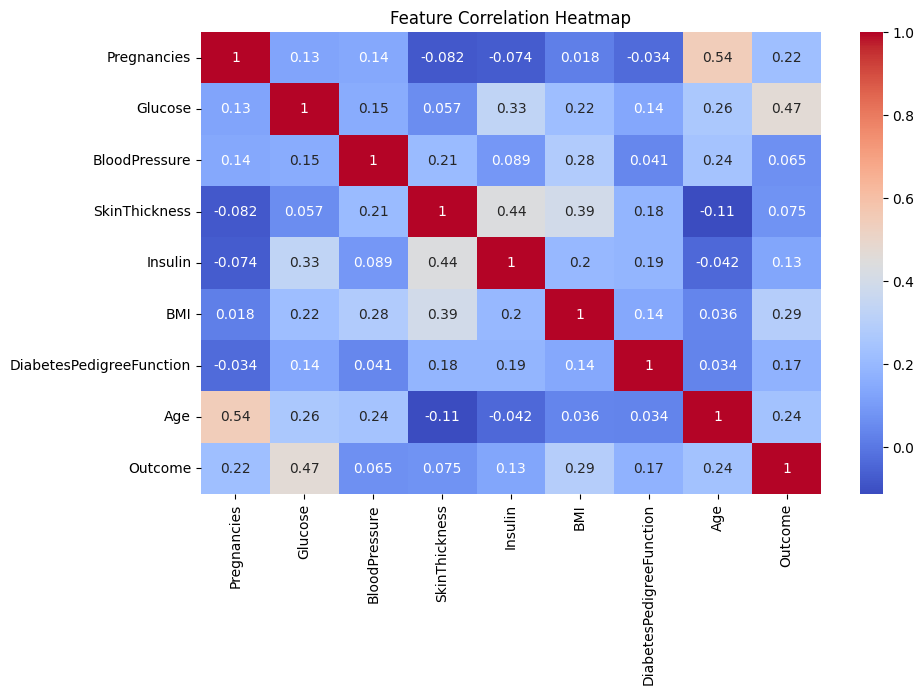

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Outcome'])
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Iris Dataset

In [3]:
import pandas as pd

df = pd.read_csv(iris_file)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [6]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the target column
df['species_encoded'] = LabelEncoder().fit_transform(df['species'])

# Correlation matrix
correlation = df.corr(numeric_only=True)

# Display correlation with species
print(correlation['species_encoded'].sort_values(ascending=False))

species_encoded    1.000000
petal_width        0.956464
petal_length       0.949043
sepal_length       0.782561
sepal_width       -0.419446
Name: species_encoded, dtype: float64


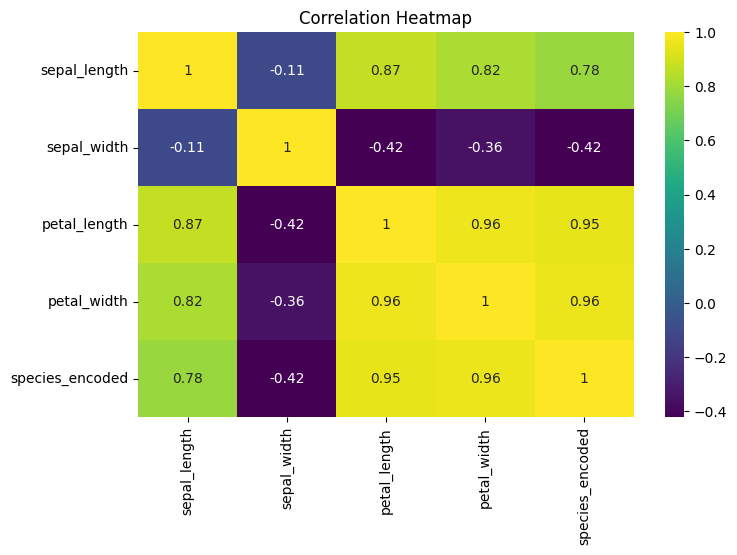

In [7]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()